## Regression Problem: Wind Production Prediction
In this exercise, we will solve a regression problem with a neural network.

**Objective:** The goal is to predict the electricity production of windmills in France.

**Dataset:**  A csv file with 8 784 samples from the year 2016 is provided (on the course webpage). Each example contains three input features describing the weather at that time. We will use 6 000 examples as training set, 1 000 as validation set and the rest as test set.   
   * **Feature names**: FR_windspeed_10, FR_temperature, FR_radiation_direct_horizontal
   * **Target**: FR_wind_onshore_generation_actual

**NB:** new required libraries: `pandas`, `seaborn`.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [0]:
# Load data:
df = pd.read_csv("FR_wind_predict_2016.csv", parse_dates=[0], index_col=0)

In [3]:
df.head(3)

,FR_wind_onshore_generation_actual,FR_windspeed_10m,FR_temperature,FR_radiation_direct_horizontal
utc_timestamp,,,,
2016-01-01 00:00:00+00:00,2082.0,2.86,5.571,0.0
2016-01-01 01:00:00+00:00,1690.0,2.68,5.415,0.0
2016-01-01 02:00:00+00:00,1414.0,2.51,5.288,0.0


In [4]:
df.info() # get more information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8783 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 22:00:00+00:00
Data columns (total 4 columns):
FR_wind_onshore_generation_actual    8783 non-null float64
FR_windspeed_10m                     8783 non-null float64
FR_temperature                       8783 non-null float64
FR_radiation_direct_horizontal       8783 non-null float64
dtypes: float64(4)
memory usage: 343.1 KB


### Data Analysis
Before training, we need first to analyze the dataset, to know its properties better.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(0, 10000)

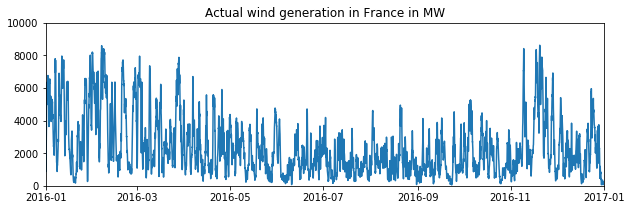

In [5]:

plt.figure(figsize=(10, 3))
plt.plot(df.index, df['FR_wind_onshore_generation_actual'])
plt.title('Actual wind generation in France in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 10000)

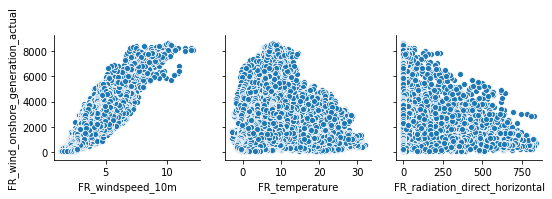

In [6]:
sns.pairplot(df, x_vars=['FR_windspeed_10m', 'FR_temperature', 'FR_radiation_direct_horizontal'], y_vars=['FR_wind_onshore_generation_actual'])

### Wind prediction

Here is a skeleton of a neural network with a single layer (thus: a linear classifier). This is the model you'll start with and improve during this exercise.

Look at the code and run it to see its structure, then follow the questions below to iteratively improve the model.

In [0]:
X_wind = df[['FR_windspeed_10m', 'FR_temperature', 'FR_radiation_direct_horizontal']] # get the three features from the dataframe
y_wind = df["FR_wind_onshore_generation_actual"] # get the target values

In [0]:
X_train = X_wind.iloc[:6000]
y_train = y_wind.iloc[:6000]

X_val = X_wind.iloc[6000:7000]
y_val = y_wind.iloc[6000:7000]

X_test = X_wind.iloc[7000:]
y_test = y_wind.iloc[7000:]

In [0]:
# Construct a model with one layer
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.l1 = nn.Linear(3, 20)
        self.l2 = nn.Linear(20, 20)
        self.l3 = nn.Linear(20, 1)
        
    def forward(self, inputs):
        x = torch.tanh(self.l1(inputs))
        x = torch.tanh(self.l2(x))
        outputs = self.l3(x)
        return outputs

In [0]:
# Define hyper-parameters:
model = Model()

# Choose the hyperparameters for training: 
num_epochs = 50
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer =torch.optim.Adam(model.parameters(), lr=0.01)

In [0]:
train_set = TensorDataset(torch.from_numpy(np.array(X_train)).float(), 
                          torch.from_numpy(np.array(y_train)).float()) # creat the dataset.

In [0]:
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
    dataloader = DataLoader(dataset, batch_size, shuffle=True)

    model.train()
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        for (X, y) in (dataloader):

            y_pre = model(X).view(-1)
            loss = criterion(y_pre, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(train_set)
            
        if ((epoch+1)%1 == 0):
                print('Epoch [{}/{}], Loss_error: {:.4f}'
                      .format(epoch+1, num_epochs,  epoch_average_loss))
                

In [88]:
train(num_epochs, batch_size, criterion, optimizer, model, train_set)

Epoch [1/50], Loss_error: 9234339.2979
Epoch [2/50], Loss_error: 8667419.1946
Epoch [3/50], Loss_error: 8142517.3418
Epoch [4/50], Loss_error: 7656402.8928
Epoch [5/50], Loss_error: 7206107.2311
Epoch [6/50], Loss_error: 6786701.3515
Epoch [7/50], Loss_error: 6396308.7264
Epoch [8/50], Loss_error: 6034873.7317
Epoch [9/50], Loss_error: 5702399.7572
Epoch [10/50], Loss_error: 5396922.2824
Epoch [11/50], Loss_error: 5118199.5645
Epoch [12/50], Loss_error: 4866038.5288
Epoch [13/50], Loss_error: 4638665.0503
Epoch [14/50], Loss_error: 4435727.0789
Epoch [15/50], Loss_error: 4257892.8189
Epoch [16/50], Loss_error: 4102142.3041
Epoch [17/50], Loss_error: 3968067.7076
Epoch [18/50], Loss_error: 3853438.4609
Epoch [19/50], Loss_error: 3758041.2099
Epoch [20/50], Loss_error: 3680446.1796
Epoch [21/50], Loss_error: 3618586.8597
Epoch [22/50], Loss_error: 3570817.6081
Epoch [23/50], Loss_error: 3534130.1276
Epoch [24/50], Loss_error: 3506700.2521
Epoch [25/50], Loss_error: 3434375.5191
Epoch [26

+#### Evaluate the Model on the validation set

In [89]:
# Calculate mean squared error on validation set
model.eval()
with torch.no_grad():
    y_pre_val = model(torch.from_numpy(np.array(X_val)).float()).view(-1)
error = criterion(y_pre_val, torch.tensor(np.array(y_val)).float()).item()
print('The loss on validation set is:', error)

The loss on validation set is: 687078.625


### Exercise 1: Impact of the architecture of the model

The class `Model` is the definition of your model. You can now modify it to try out different architectures and
see the impact of the following factors:

* Try to add more layers (1, 2, 3, more ?)
* Try different activation functions ([sigmoid](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.sigmoid), [tanh](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.tanh), [relu](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu), etc.)
* Try to change the number of neurons in each layer (5, 10, 20, more ?)

### Exercise 2: Impact of the optimizer

Retrain the model with different parameters of the optimizer; you can change then in the cell initializing the optimizer, after the definition of your model.

* Use different batch sizes, from 10 to 400 e.g.
* Try different values of the learning rate (between 0.001 and 10), and see how they impact the training process. Do all network architectures react the same way to different learning rates?
* Change the duration of the training by increasing the number of epochs
* Try other optimizers, such as [Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) or [RMSprop](https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop)

**Note:** These changes may interact with your previous choices of architectures, and you may need to change them as well!

### Exercise 3: Impact of the loss function
As mensioned before in the first problem (binary classification), one can minimize the negative of log-likelihood of the probability for all samples $x$: $$ \sum_{(x,y) \,\in\, \text{Dataset}} - \log p(y | x) $$ If we define $p(y_i | x_i) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(y_i - f(x_i))^2}{2}}$, then the loss function becomes the mean squared error. 

There is another loss function worth to try: the Gaussian likelihood loss function. 
Rather than predicting a single value $y$ given $x$, we predict a probability distribution over possible answers, which helps dealing with ambiguous cases and expressing uncertainty. To do this, for each possible input $x$, the network will output the parameters of the distribution modeling $p(y|x)$. For instance in our case, we choose to model output distributions with Gaussian distributions $\mathcal{N}(\mu, \sigma)$, which are parameterized by their mean $\mu$ and their standard deviation $\sigma$. Therefore for each input $x$ we have to output two quantities: $\mu(x)$ and $\sigma(x)$. The probability becomes: $$p(y_i | x_i) = \frac{1}{\sqrt{2\pi \sigma(x_i)^2}}e^{-\frac{(y_i - \mu(x_i))^2}{2\sigma(x_i)^2}}$$ Then the loss function becomes: $$L =\sum\limits_{i=1}^{N}  \frac{1}{2} \log ( 2\pi\sigma_i^{2} ) + \frac{1}{2\sigma_i^{2}}  (y_{i} - \mu_i)^{2}$$ If we set $\sigma=1$, we obtain MSE the loss function. 

* Try to replace the loss function with this one, and compare the differences between the two losses.
 
* **Hints**: 
    * You need two outputs of your network, one represents the $\mu(x_i)$, another for $\log( \sigma(x_i)^2 )$ (better for optimization) 
    * Try deeper models, or you will not predict the variance $\sigma$ well. 


In [0]:
# Construct a model with one layer
class Model2(nn.Module):
    
    def __init__(self):
        super(Model2, self).__init__()
        
        self.l1 = nn.Linear(3, 32)
        self.l2 = nn.Linear(32, 16)
        self.l3 = nn.Linear(16, 2)
        
    def forward(self, inputs):
        x = torch.tanh(self.l1(inputs))
        x = torch.tanh(self.l2(x))
        outputs = self.l3(x)
        return outputs



In [0]:
# Define hyper-parameters:
model = Model2()

# Choose the hyperparameters for training: 
num_epochs = 50
batch_size = 16

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label

def my_loss(output, target):
    sigma_2 = torch.exp(output[:,1])
    loss = torch.mean(torch.add(output[:,1], torch.div(torch.sub(output[:,0],target).pow(2),sigma_2)))
    return loss

# Optimizer
optimizer =torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
def train(num_epochs, batch_size, my_loss, optimizer, model, dataset):
    dataloader = DataLoader(dataset, batch_size, shuffle=True)

    model.train()
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0

        for (X, y) in (dataloader):

            y_pre = model(X)
            loss = my_loss(y_pre, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(train_set)
            
        if ((epoch+1)%1 == 0):
                print('Epoch [{}/{}], Loss_error: {:.4f} '
                      .format(epoch+1, num_epochs,  epoch_average_loss))
                

In [107]:
train(num_epochs, batch_size, my_loss, optimizer, model, train_set)

Epoch [1/50], Loss_error: 882465.9643 
Epoch [2/50], Loss_error: 81967.3724 
Epoch [3/50], Loss_error: 34892.3560 
Epoch [4/50], Loss_error: 19762.1784 
Epoch [5/50], Loss_error: 12712.5007 
Epoch [6/50], Loss_error: 8786.4792 
Epoch [7/50], Loss_error: 6359.3640 
Epoch [8/50], Loss_error: 4752.9551 
Epoch [9/50], Loss_error: 3635.3251 
Epoch [10/50], Loss_error: 2827.8420 
Epoch [11/50], Loss_error: 2228.8844 
Epoch [12/50], Loss_error: 1775.3229 
Epoch [13/50], Loss_error: 1425.8782 
Epoch [14/50], Loss_error: 1152.5447 
Epoch [15/50], Loss_error: 936.6277 
Epoch [16/50], Loss_error: 764.7037 
Epoch [17/50], Loss_error: 626.8683 
Epoch [18/50], Loss_error: 515.7468 
Epoch [19/50], Loss_error: 425.5228 
Epoch [20/50], Loss_error: 352.0108 
Epoch [21/50], Loss_error: 291.9826 
Epoch [22/50], Loss_error: 242.8562 
Epoch [23/50], Loss_error: 202.6081 
Epoch [24/50], Loss_error: 169.5574 
Epoch [25/50], Loss_error: 142.3446 
Epoch [26/50], Loss_error: 119.9254 
Epoch [27/50], Loss_error: 

In [108]:
# Calculate mean squared error on validation set
model.eval()
with torch.no_grad():
    y_pre_val = model(torch.from_numpy(np.array(X_val)).float())
error = my_loss(y_pre_val, torch.tensor(np.array(y_val)).float()).item()
print('The loss on validation set is:', error)

The loss on validation set is: 16.338775634765625


### Exercice 4: Prediction on test set

* Once you have a model that seems satisfying on the validation dataset, you SHOULD evaluate it on a test dataset that has never been used before, to obtain a final accuracy value.
* When using the Gaussian likelihood function, the confidence of the network in its prediction is reflected in the variance it outputs. It can be interesting to check how this uncertainty varies with the data. For example, the uncertainty will decrease when the feature `FR_radiation_direct_horizontal` increases. Plot the variance $\sigma(x)$ w.r.t one of the three features, on test set, and describe what you observe.

In [111]:
model.eval()
with torch.no_grad():
    y_pre_test = model(torch.from_numpy(np.array(X_test)).float())
loss_test = my_loss(y_pre_test, torch.tensor(np.array(y_test)).float())
print('The Loss on test set is:', round(loss_test.item(),2))

The Loss on test set is: 17.11


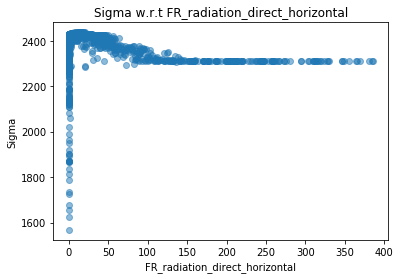

In [130]:
model.eval()
with torch.no_grad():
    output = model(torch.from_numpy(np.array(X_test)).float())
    sigma = np.array(torch.sqrt(torch.exp(output[:,1])))

x = X_test['FR_radiation_direct_horizontal'].values
# Plot
plt.scatter(x, sigma , alpha=0.5)
plt.title('Sigma w.r.t FR_radiation_direct_horizontal')
plt.xlabel('FR_radiation_direct_horizontal')
plt.ylabel('Sigma')
plt.show()